In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv(r'fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df.drop(['job_id', 'salary_range'], axis=1, inplace=True)

In [7]:
df.fillna('', inplace=True)

In [8]:
df.isna().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [10]:
df['text'] = df[['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits']].agg(' '.join, axis=1)

In [17]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def clean_text(text):
    soup=BeautifulSoup(text, 'html.parser')
    text=soup.get_text()    
    text = re.sub(r'\[[^\]]*\]', '', text)
    text=re.sub('[^a-zA-Z]',' ',text)
    text=text.lower()
    stop=set(stopwords.words('english'))
    text=' '.join([word for word in text.split() if word not in stop])  
    lemmatizer=WordNetLemmatizer()
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])  
    return text

In [18]:
df['text'] = df['text'].apply(clean_text)
display(df[['text', 'fraudulent']].head())

C:\Users\Welcome\AppData\Local\Temp\ipykernel_5580\351506712.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text, 'html.parser')


,text,fraudulent
0,marketing intern u ny new york marketing food ...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma u ia wev...,0
3,account executive washington dc u dc washingto...,0
4,bill review manager u fl fort worth spotsource...,0


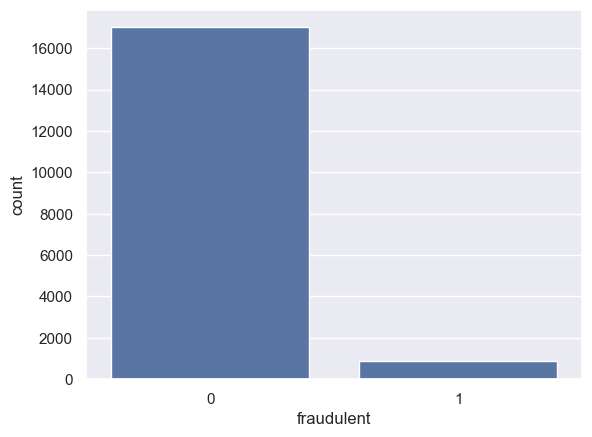

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")              # 1
sns.countplot(x='fraudulent', data=df) # 2
plt.show()                             # 3


In [20]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (14304,)
Testing set shape: (3576,)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (14304, 5000)
Shape of X_test_tfidf: (3576, 5000)


In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650,497 (2.48 MB)

 Trainable params: 650,497 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

history = model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_split=0.2)

Shape of X_train_resampled: (27238, 5000)
Shape of y_train_resampled: (27238,)
Epoch 1/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9748 - loss: 0.0644 - val_accuracy: 0.9958 - val_loss: 0.0176
Epoch 2/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9987 - loss: 0.0055 - val_accuracy: 0.9980 - val_loss: 0.0083
Epoch 3/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9990 - loss: 0.0038 - val_accuracy: 0.9976 - val_loss: 0.0083
Epoch 4/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 2.8817e-04
Epoch 5/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9998 - loss: 3.7094e-04 - val_accuracy: 1.0000 - val_loss: 4.7719e-05


Test Accuracy: 0.9835
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3395
           1       0.90      0.76      0.82       181

    accuracy                           0.98      3576
   macro avg       0.94      0.88      0.91      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
[[3379   16]
 [  43  138]]


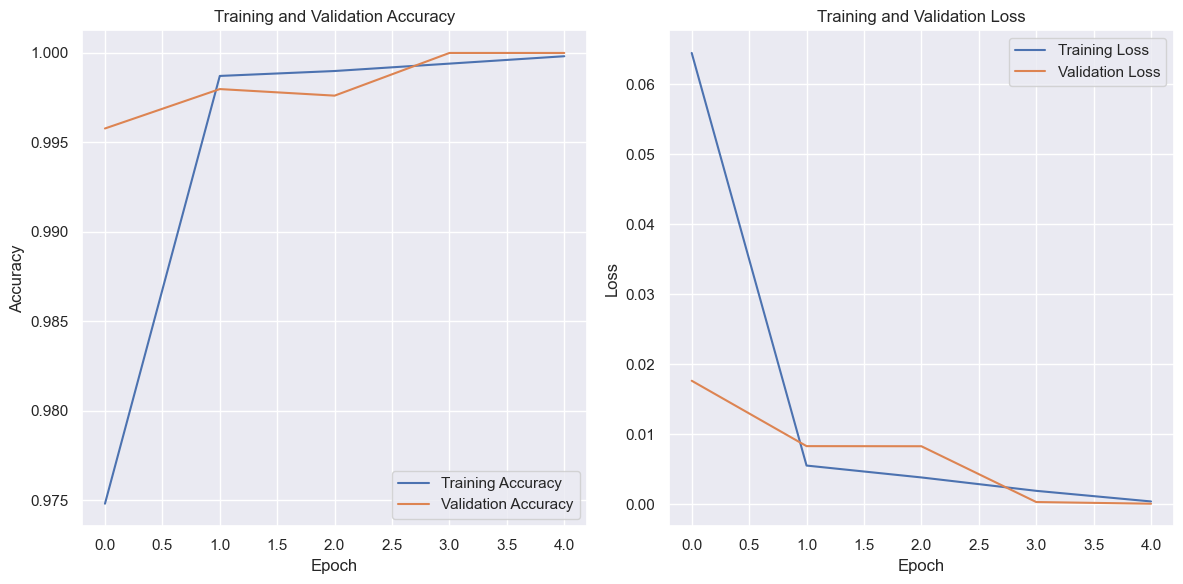

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Get predictions
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()